# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shalqar
Processing Record 2 of Set 1 | lodja
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | robit
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | todos santos
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | puerto baquerizo moreno
Processing Record 9 of Set 1 | touros
Processing Record 10 of Set 1 | mascotte
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | mitchell
Processing Record 13 of Set 1 | nemuro
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | aasiaat
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | zahedan
Processing Record 20 of Set 1 | fort mcmurray
Processing Record 21 of Set 1 | yuci
Processing Record 22 of Set 1 | 

Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | salekhard
Processing Record 43 of Set 4 | al bawiti
Processing Record 44 of Set 4 | tommot
Processing Record 45 of Set 4 | eyl
Processing Record 46 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 47 of Set 4 | puerto escondido
Processing Record 48 of Set 4 | safotu
Processing Record 49 of Set 4 | artigas
Processing Record 0 of Set 5 | belyy yar
Processing Record 1 of Set 5 | penzance
Processing Record 2 of Set 5 | zaozersk
Processing Record 3 of Set 5 | yangquan
Processing Record 4 of Set 5 | stanley
Processing Record 5 of Set 5 | makurazaki
Processing Record 6 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 7 of Set 5 | yahyali
Processing Record 8 of Set 5 | mbandaka
Processing Record 9 of Set 5 | ilulissat
Processing Record 10 of Set 5 | ingeniero jacobacci
Processing Record 11 of Set 5 | okha
Processing Record 12 of Set 5 | wailua homesteads
Processing Record

Processing Record 30 of Set 8 | khandyga
Processing Record 31 of Set 8 | patong
Processing Record 32 of Set 8 | apolinario saravia
Processing Record 33 of Set 8 | tarnogskiy gorodok
Processing Record 34 of Set 8 | gwanda
Processing Record 35 of Set 8 | aljezur
Processing Record 36 of Set 8 | barra de santo antonio
Processing Record 37 of Set 8 | ouellah
City not found. Skipping...
Processing Record 38 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 39 of Set 8 | novodvinsk
Processing Record 40 of Set 8 | sault ste. marie
Processing Record 41 of Set 8 | greymouth
Processing Record 42 of Set 8 | okhotsk
Processing Record 43 of Set 8 | yemva
Processing Record 44 of Set 8 | vrangel'
Processing Record 45 of Set 8 | yanchep
Processing Record 46 of Set 8 | bluffton
Processing Record 47 of Set 8 | zvishavane
Processing Record 48 of Set 8 | palapag
Processing Record 49 of Set 8 | remire-montjoly
Processing Record 0 of Set 9 | lautoka
Processing Record 1 of Set 9 | xiva
Pr

Processing Record 17 of Set 12 | saudarkrokur
Processing Record 18 of Set 12 | coaldale
Processing Record 19 of Set 12 | tuzha
Processing Record 20 of Set 12 | la rinconada
Processing Record 21 of Set 12 | temizhbekskaya
Processing Record 22 of Set 12 | tongchuanshi
Processing Record 23 of Set 12 | lincoln
Processing Record 24 of Set 12 | tobol
Processing Record 25 of Set 12 | gunjur
Processing Record 26 of Set 12 | hadithah
-----------------------------
Data Retrieval Complete      
-----------------------------


In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shalqar,47.8333,59.6000,23.94,21,35,6.12,KZ,1686427367
1,lodja,-3.4833,23.4333,24.26,71,80,0.85,CD,1686427367
2,blackmans bay,-43.0167,147.3167,10.07,82,99,2.55,AU,1686427367
3,robit,12.0167,39.6333,24.06,44,100,0.70,ET,1686427367
4,grytviken,-54.2811,-36.5092,0.54,98,100,2.14,GS,1686427368


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
#convert date to be more readable
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit ="s")
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shalqar,47.8333,59.6000,23.94,21,35,6.12,KZ,2023-06-10 20:02:47
1,lodja,-3.4833,23.4333,24.26,71,80,0.85,CD,2023-06-10 20:02:47
2,blackmans bay,-43.0167,147.3167,10.07,82,99,2.55,AU,2023-06-10 20:02:47
3,robit,12.0167,39.6333,24.06,44,100,0.70,ET,2023-06-10 20:02:47
4,grytviken,-54.2811,-36.5092,0.54,98,100,2.14,GS,2023-06-10 20:02:48
...,...,...,...,...,...,...,...,...,...
549,tongchuanshi,35.0806,109.0897,21.78,29,100,1.73,CN,2023-06-10 20:03:57
550,lincoln,40.8000,-96.6670,27.67,63,0,0.00,US,2023-06-10 20:00:13
551,tobol,52.6844,62.5794,17.34,43,0,1.33,KZ,2023-06-10 20:03:57
552,gunjur,13.2019,-16.7339,29.04,70,0,3.09,GM,2023-06-10 20:03:57


In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shalqar,47.8333,59.6000,23.94,21,35,6.12,KZ,1686427367
1,lodja,-3.4833,23.4333,24.26,71,80,0.85,CD,1686427367
2,blackmans bay,-43.0167,147.3167,10.07,82,99,2.55,AU,1686427367
3,robit,12.0167,39.6333,24.06,44,100,0.70,ET,1686427367
4,grytviken,-54.2811,-36.5092,0.54,98,100,2.14,GS,1686427368


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

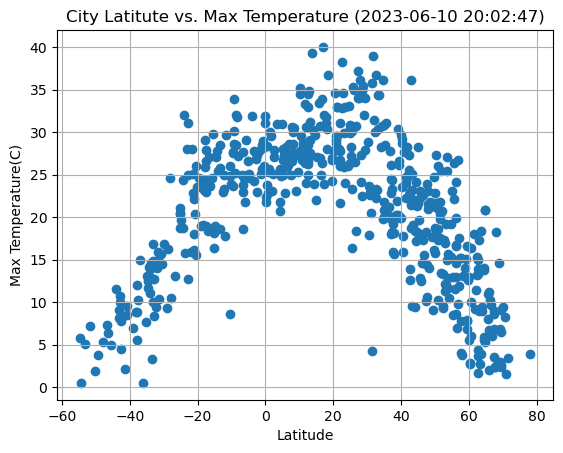

In [32]:
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit ="s")
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title(f"City Latitute vs. Max Temperature ({city_data_df.iloc[0,8]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid("on")



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

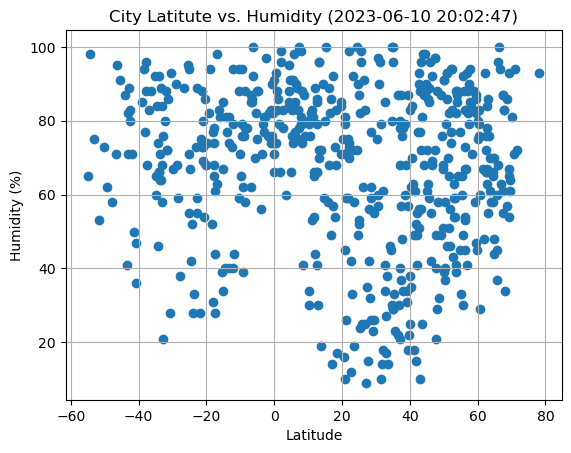

In [36]:
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit ="s")

# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title(f"City Latitute vs. Humidity ({city_data_df.iloc[0,8]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid("on")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

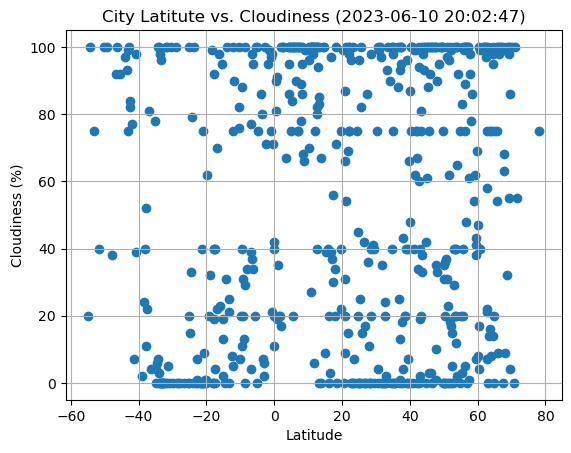

In [38]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title(f"City Latitute vs. Cloudiness ({city_data_df.iloc[0,8]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid("on")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

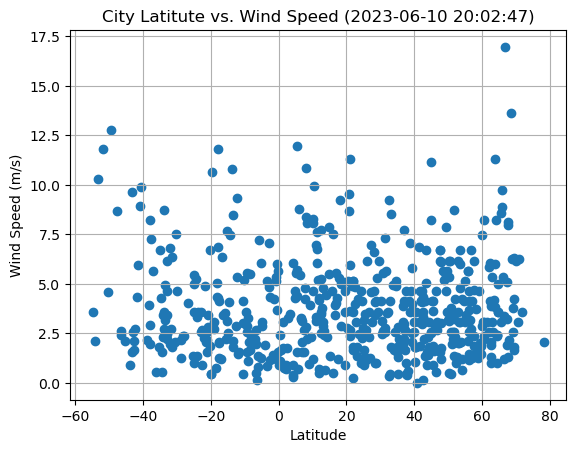

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title(f"City Latitute vs. Wind Speed ({city_data_df.iloc[0,8]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid("on")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
from scipy import stats




In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shalqar,47.8333,59.6000,23.94,21,35,6.12,KZ,2023-06-10 20:02:47
3,robit,12.0167,39.6333,24.06,44,100,0.70,ET,2023-06-10 20:02:47
5,todos santos,23.4500,-110.2167,24.07,58,0,4.23,MX,2023-06-10 20:02:48
9,mascotte,28.5783,-81.8867,35.00,62,98,1.00,US,2023-06-10 20:02:48
11,mitchell,43.7094,-98.0298,22.08,88,100,1.54,US,2023-06-10 19:58:35


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lodja,-3.4833,23.4333,24.26,71,80,0.85,CD,2023-06-10 20:02:47
2,blackmans bay,-43.0167,147.3167,10.07,82,99,2.55,AU,2023-06-10 20:02:47
4,grytviken,-54.2811,-36.5092,0.54,98,100,2.14,GS,2023-06-10 20:02:48
6,puerto natales,-51.7236,-72.4875,7.25,53,40,11.83,CL,2023-06-10 20:02:48
7,puerto baquerizo moreno,-0.9000,-89.6000,28.55,74,75,5.14,EC,2023-06-10 20:02:48


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.7521331985771783


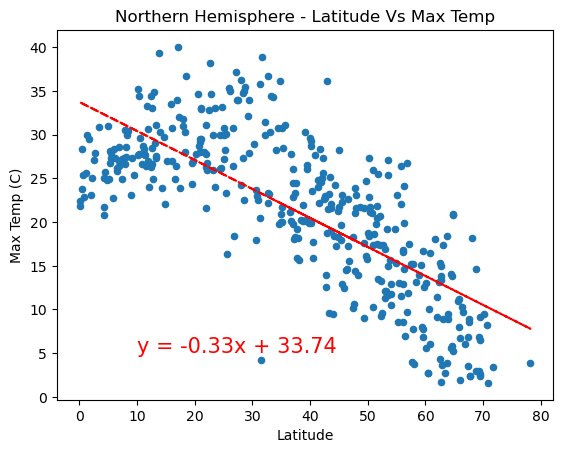

In [63]:
# Linear regression on Northern Hemisphere

slope, int, r, p, std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
lin_reg = (slope * northern_hemi_df["Lat"]) + int


northern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Max Temp",
                     xlabel= "Latitude", ylabel= "Max Temp (C)",
                     title = "Northern Hemisphere - Latitude Vs Max Temp")
plt.plot(northern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(10,5),fontsize=15, color = "red")



print(f"The r value is: {r}")
plt.show()


The r value is: 0.8588091926592656


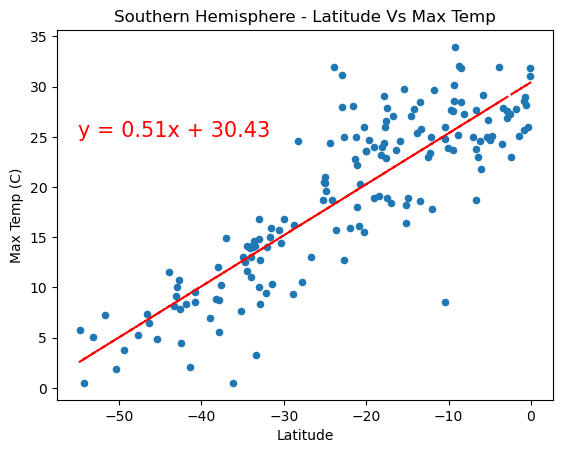

In [67]:
# Linear regression on Southern Hemisphere
slope, int, r, p, std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
lin_reg = (slope * southern_hemi_df["Lat"]) + int

southern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Max Temp",
                     xlabel= "Latitude", ylabel= "Max Temp (C)",
                     title = "Southern Hemisphere - Latitude Vs Max Temp")
plt.plot(southern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(-55,25),fontsize=15, color = "red")


print(f"The r value is: {r}")
plt.show()


**Discussion about the linear relationship:** 

-- The r value is greater than .5, therefore, the max temperature of a given city does correlate with the city's latitude

### Humidity vs. Latitude Linear Regression Plot

The r value is: -0.055378035742732534


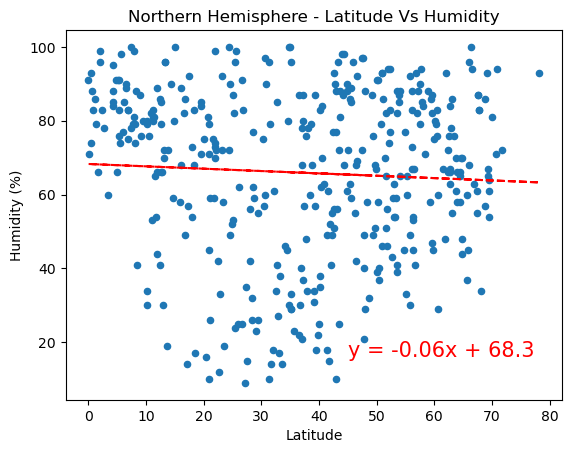

In [70]:
# Northern Hemisphere
slope, int, r, p, std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
lin_reg = (slope * northern_hemi_df["Lat"]) + int

northern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Humidity",
                     xlabel= "Latitude", ylabel= "Humidity (%)",
                     title = "Northern Hemisphere - Latitude Vs Humidity")
plt.plot(northern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(45,16),fontsize=15, color = "red")


print(f"The r value is: {r}")
plt.show()



The r value is: 0.06741584985997354


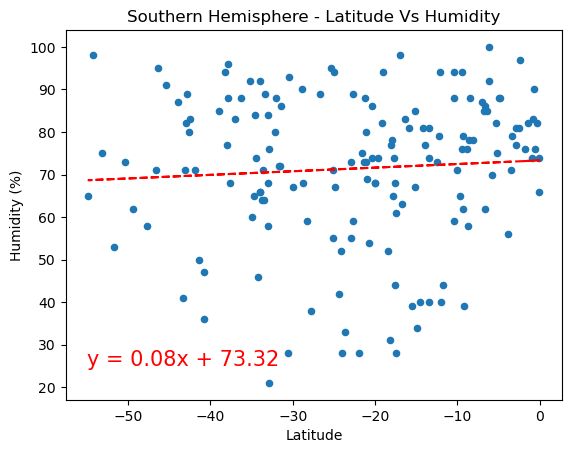

In [71]:
# Southern Hemisphere
slope, int, r, p, std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
lin_reg = (slope * southern_hemi_df["Lat"]) + int

southern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Humidity",
                     xlabel= "Latitude", ylabel= "Humidity (%)",
                     title = "Southern Hemisphere - Latitude Vs Humidity")
plt.plot(southern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(-55,25),fontsize=15, color = "red")


print(f"The r value is: {r}")
plt.show()


**Discussion about the linear relationship:**

- The r value is lower than .5. and therefore, it can be concluded that the humidity of a city does not correlate with the city's latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.07330410573235648


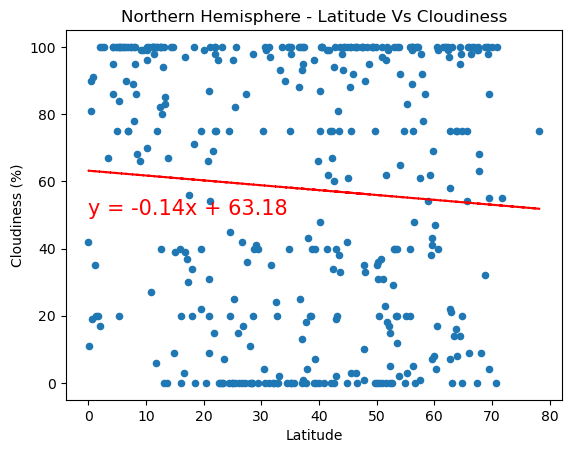

In [74]:
# Northern Hemisphere
slope, int, r, p, std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
lin_reg = (slope * northern_hemi_df["Lat"]) + int

northern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Cloudiness",
                     xlabel= "Latitude", ylabel= "Cloudiness (%)",
                     title = "Northern Hemisphere - Latitude Vs Cloudiness")
plt.plot(northern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(0,50),fontsize=15, color = "red")


print(f"The r value is: {r}")
plt.show()


The r value is: -0.03549443320176929


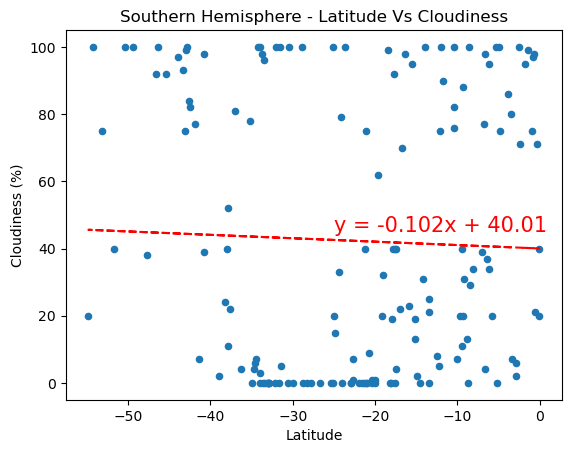

In [77]:
slope, int, r, p, std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
lin_reg = (slope * southern_hemi_df["Lat"]) + int

southern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Cloudiness",
                     xlabel= "Latitude", ylabel= "Cloudiness (%)",
                     title = "Southern Hemisphere - Latitude Vs Cloudiness")
plt.plot(southern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,3)}x + {round(int,2)}"
plt.annotate(lin_eq,(-25,45),fontsize=15, color = "red")

print(f"The r value is: {r}")
plt.show()


**Discussion about the linear relationship:

- The r value is lower than .5, and therefore, it can be concluded that the cloudiness of a city does not correlate with the city's latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.04123783238973812


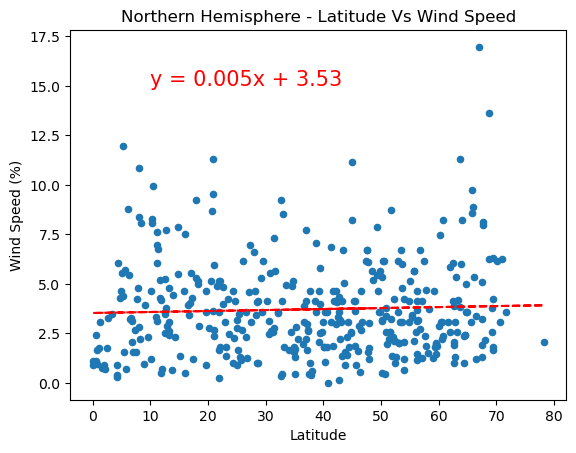

In [78]:
# Northern Hemisphere
slope, int, r, p, std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
lin_reg = (slope * northern_hemi_df["Lat"]) + int

northern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Wind Speed",
                     xlabel= "Latitude", ylabel= "Wind Speed (%)",
                     title = "Northern Hemisphere - Latitude Vs Wind Speed")
plt.plot(northern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,3)}x + {round(int,2)}"
plt.annotate(lin_eq,(10,15),fontsize=15, color = "red")

print(f"The r value is: {r}")
plt.show()


The r value is: -0.18336242974416567


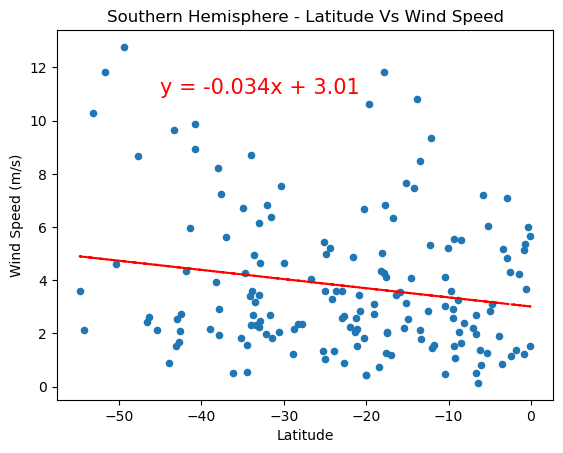

In [82]:
# Southern Hemisphere
slope, int, r, p, std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
lin_reg = (slope * southern_hemi_df["Lat"]) + int

southern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Wind Speed",
                     xlabel= "Latitude", ylabel= "Wind Speed (m/s)",
                     title = "Southern Hemisphere - Latitude Vs Wind Speed")
plt.plot(southern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,3)}x + {round(int,2)}"
plt.annotate(lin_eq,(-45,11),fontsize=15, color = "red")

print(f"The r value is: {r}")
plt.show()


**Discussion about the linear relationship:** 

- The r value is lower than .5, therefore, it can be concluded that the latitude of a city does not correlate with the city's wind speed.